In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
digits = load_digits()

In [2]:
type(digits)

sklearn.utils._bunch.Bunch

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
type(digits.data)

numpy.ndarray

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [7]:
digits.data.shape

(1797, 64)

In [8]:
type(digits.target)

numpy.ndarray

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [10]:
digits.target.shape

(1797,)

In [11]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [13]:
len(digits.images)

1797

In [14]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

In [16]:
fig, axes = plt.subplots(3, 10, figsize=(10, 5))
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap=plt.cm.gray_r)

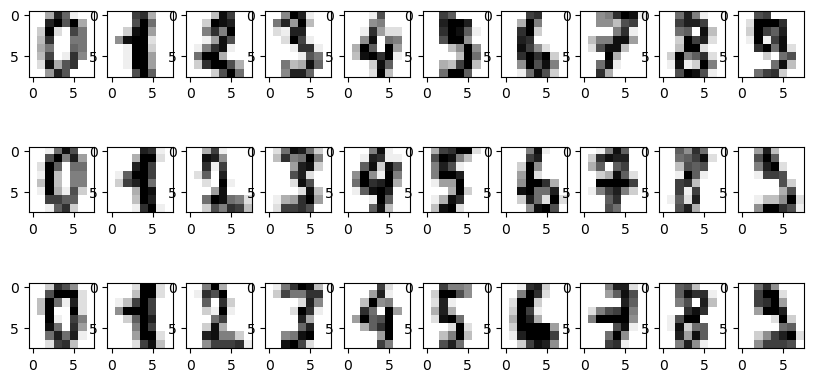

In [17]:
plt.show()

In [18]:
# Um einen Klassifikator für ein Klassifikation zu trainieren und dann später seine Güte zu bewerten, wird das Datenset 
# (genauer gesagt die Attribute data und target) in ein Trainingsset (75%) und Testset (25%) aufgeteilt
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits['data'], digits['target'], random_state=1)

In [19]:
X_train.shape

(1347, 64)

In [20]:
# Die Länge des Trainingsvektor entspricht der Anzahl an Zeilen der Trainingsmatrix.
y_train.shape

(1347,)

In [21]:
X_test.shape

(450, 64)

In [22]:
y_test.shape

(450,)

In [23]:
# Ein Objekt von dem importierten k-Nearest-Neighbor-Klassifizierer erzeugen
# Hierbei wird die Anzahl der zu betrachtenden Nachbarn angeben
knn_clf = KNeighborsClassifier(n_neighbors=1)

In [24]:
# Jetzt wird der Klassifikator mit den Trainingsdaten trainiert
# Dafür wird in scikit-learn unabhängig von Klassifikator die Methode fit genutzt
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
# Die Methode predict des trainierten Klassifiers nutzen, um Voraussagen zu erhalten
knn_clf.predict(X_test)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       9, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 3, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 7, 0, 5,

In [26]:
# Mit der Methode score() des Klassifiers die Voraussage durchführen und diese mit den tatsächlichen Target-Werten vergleichen
# Am Ende bekommen wir einen Wert zwischen 0 (schlecht) und 1 (gut).
knn_clf.score(X_test, y_test)

0.9888888888888889

In [27]:
# Das gleiche Verfahren wird jetzt mit einen k-Nearest-Neighbor-Klassifizierer durchgeführt, der drei Nachbar betrachtet 
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [28]:
# Jetzt wird der Klassifikator mit den Trainingsdaten trainiert
# Dafür wird in scikit-learn unabhängig von Klassifikator die Methode fit genutzt
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
# Die Methode predict() des trainierten Klassifiers nutzen, um Voraussagen zu erhalten
knn_clf.predict(X_test)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       9, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 9, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 7, 0, 5,

In [30]:
# Mit der Methode score() des Klassifiers die Voraussage durchführen und diese mit den tatsächlichen Target-Werten vergleichen
knn_clf.score(X_test, y_test)

0.9911111111111112

In [31]:
# Klassifikation mit einem Random-Forest-Klassifikator erstellen (äquivalent zu der vorherigen Herangehensweise)
from sklearn.ensemble import RandomForestClassifier
random_forest_cfl = RandomForestClassifier(random_state=1)

In [32]:
random_forest_cfl.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [33]:
random_forest_cfl.score(X_test, y_test)

0.98

In [34]:
# Klassifikation mit einem künstlichen, neuronalen Netz (Multi-Layer-Perceptron) erstellen
# Standardmäßig hat das Netz ein Hidden-Layer mit 100 Nodes
from sklearn.neural_network import MLPClassifier

In [35]:
mlpc = MLPClassifier(random_state=1)
mlpc.fit(X_train, y_train)

MLPClassifier(random_state=1)

In [36]:
mlpc.score(X_test, y_test)

0.9755555555555555

In [37]:
# Anzahl an Hidden-Layer und Anzahl an Nodes als Parameter für den MLPClassifier setzen (hier 3 Schichten mit mit 200, 100 und 20 Nodes)
MLPClassifier(random_state=1, hidden_layer_sizes=(200, 100, 20)).fit(
    X_train, y_train).score(X_test, y_test)

0.9844444444444445